In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [8]:
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [9]:
df.shape

(2893, 3)

In [10]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

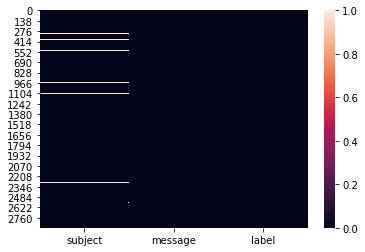

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [14]:
df.label.value_counts()

0    2363
1     468
Name: label, dtype: int64

In [15]:
print('spam ratio = ',round(len(df[df['label']==1])/len(df.label),2)*100,'%')
print('ham ratio = ',round(len(df[df['label']==0])/len(df.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio =  83.0 %


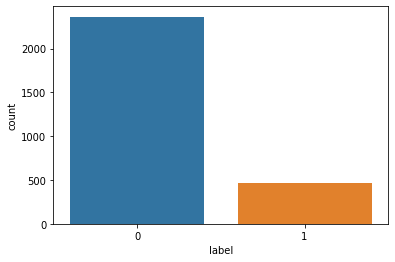

In [16]:
sns.countplot(x='label',data=df)

In [17]:
df["full_message"] = df["subject"] + df["message"]

In [18]:
df.drop(['subject', 'message'], axis=1, inplace=True)

In [19]:
df.head()

,label,full_message
0,0,job posting - apple-iss research centercontent...
2,0,query : letter frequencies for text identifica...
3,0,riska colleague and i are researching the diff...
4,0,request book informationearlier this morning i...
5,0,call for abstracts : optimality in syntactic t...


In [20]:
#new column for length of message

df['message_length']=df.full_message.str.len()

In [21]:
df.head()

,label,full_message,message_length
0,0,job posting - apple-iss research centercontent...,2895
2,0,query : letter frequencies for text identifica...,1485
3,0,riska colleague and i are researching the diff...,328
4,0,request book informationearlier this morning i...,1070
5,0,call for abstracts : optimality in syntactic t...,4543


In [22]:
df['full_message']=df['full_message'].str.lower()

In [23]:
df.head()

,label,full_message,message_length
0,0,job posting - apple-iss research centercontent...,2895
2,0,query : letter frequencies for text identifica...,1485
3,0,riska colleague and i are researching the diff...,328
4,0,request book informationearlier this morning i...,1070
5,0,call for abstracts : optimality in syntactic t...,4543


In [24]:
#Replace email adress with email
df['full_message']=df['full_message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#repace urls with 'webaddress'
df['full_message']=df['full_message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#replace money symbols
df['full_message']=df['full_message'].str.replace(r'£|\$','dollers')

#replace 10 digit phone numbers with phonenumber
df['full_message']=df['full_message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with 'numbr
df['full_message']=df['full_message'].str.replace(r'\d+(\.\d+)?','numbr')

In [25]:
#remove punctuation
df['full_message']=df['full_message'].str.replace(r'[^\w\d\s]',' ')

#replace whitespace with a single space
df['full_message']=df['full_message'].str.replace(r'\s+',' ')

#remove leading and trailing whitespace
df['full_message']=df['full_message'].str.replace(r'^\s+|\s+?$','')

In [26]:
df.head()

,label,full_message,message_length
0,0,job posting apple iss research centercontent l...,2895
2,0,query letter frequencies for text identificati...,1485
3,0,riska colleague and i are researching the diff...,328
4,0,request book informationearlier this morning i...,1070
5,0,call for abstracts optimality in syntactic the...,4543


In [27]:
#remove stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')+['u','ur','4','2','in','dont','doin','ure'])
df['full_message']=df['full_message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YaTiKa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df['clean_length']=df.full_message.str.len()
df.head()

,label,full_message,message_length,clean_length
0,0,job posting apple iss research centercontent l...,2895,2216
2,0,query letter frequencies text identificationi ...,1485,1110
3,0,riska colleague researching differing degrees ...,328,216
4,0,request book informationearlier morning phone ...,1070,653
5,0,call abstracts optimality syntactic theorycont...,4543,3412


In [29]:
print('Original Length', df.message_length.sum())
print('Clean Length',df.clean_length.sum())

Original Length 9278085
Clean Length 6726175


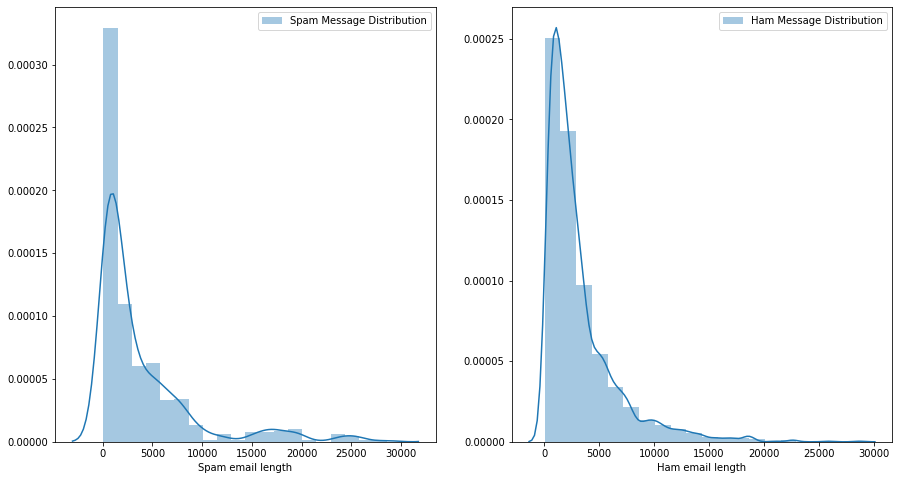

In [30]:
#Message distribution before cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['label']==1]['message_length'],bins=20,ax=ax[0],label='Spam Message Distribution')
ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(df[df['label']==0]['message_length'],bins=20,ax=ax[1],label='Ham Message Distribution')
ax[1].set_xlabel('Ham email length')
ax[1].legend()

plt.show()

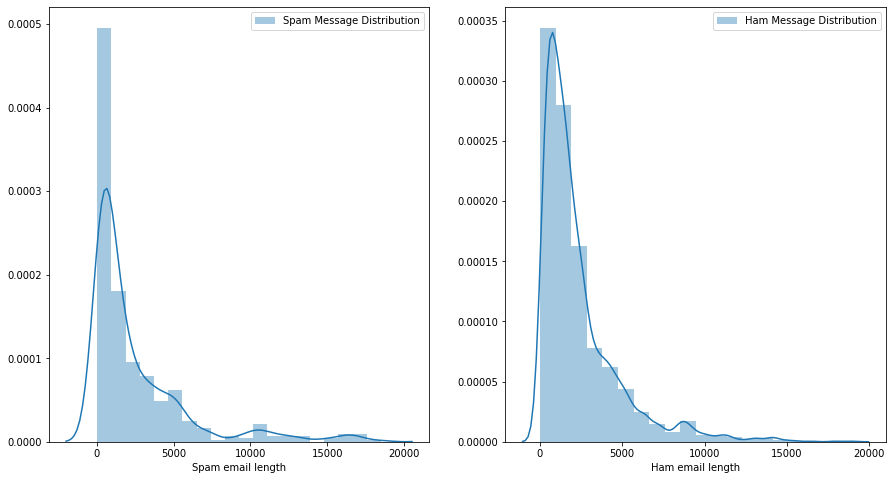

In [31]:
#Message distribution after cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam Message Distribution')
ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='Ham Message Distribution')
ax[1].set_xlabel('Ham email length')
ax[1].legend()

plt.show()

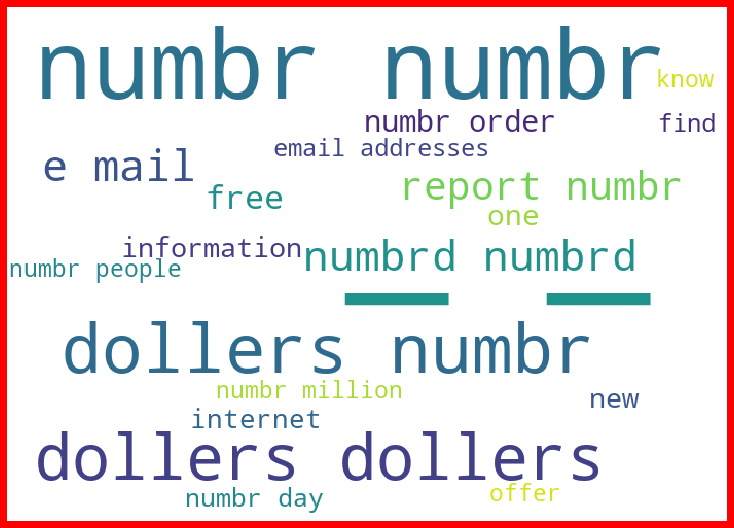

In [32]:
#loud words in spam

from wordcloud import WordCloud

spams = df['full_message'][df['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


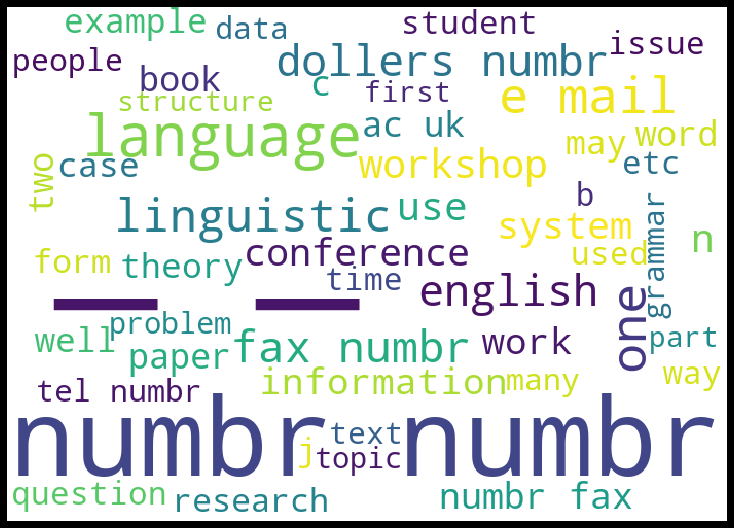

In [34]:
hams = df['full_message'][df['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['full_message'])
X = features
y=df['label']

In [ ]:
naive= MultinomialNB()

In [37]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=42)
naive.fit(X_train,Y_train)
y_pred=naive.predict(x_test)
print('Final Score = > ', accuracy_score(y_test,y_pred))

Final Score = >  0.8488700564971752


In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       584
           1       1.00      0.14      0.24       124

    accuracy                           0.85       708
   macro avg       0.92      0.57      0.58       708
weighted avg       0.87      0.85      0.80       708



In [40]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[584,   0],
       [107,  17]], dtype=int64)

In [41]:
from sklearn.tree import DecisionTreeClassifier 

In [42]:
model_tree=DecisionTreeClassifier()

In [44]:
model_tree.fit(X_train,Y_train)
y_pred=model_tree.predict(x_test)
print('Final Score = > ', accuracy_score(y_test,y_pred))

Final Score = >  0.961864406779661


In [45]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [46]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[573,  11],
       [ 16, 108]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       584
           1       0.91      0.87      0.89       124

    accuracy                           0.96       708
   macro avg       0.94      0.93      0.93       708
weighted avg       0.96      0.96      0.96       708



In [48]:
from sklearn.ensemble import RandomForestClassifier


In [49]:
rf=RandomForestClassifier(n_estimators=20,criterion='entropy')

In [51]:
rf.fit(X_train,Y_train)
y_pred=rf.predict(x_test)
print('Final Score = > ', accuracy_score(y_test,y_pred))

Final Score = >  0.9745762711864406


In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [53]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[584,   0],
       [ 18, 106]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       584
           1       1.00      0.85      0.92       124

    accuracy                           0.97       708
   macro avg       0.99      0.93      0.95       708
weighted avg       0.98      0.97      0.97       708



Comparing the above 3 models random forest classifier is most suitable fit since it has highest accuracy and f-1 score.

In [55]:
from sklearn.externals import joblib
joblib.dump(rf,'rf_emailspam.pkl')

C:\Users\YaTiKa\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['rf_emailspam.pkl']